<a href="https://colab.research.google.com/github/StacyMwende/Week_6_IP_FIFA_Analysis/blob/master/Moringa_Data_Science_Core_W6_Independent_Project_2020_01_Stacy_Mwende_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Defining the question

# Importing libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import scipy as sp

# a) Specifying the question

You have been recruited as a football analyst in a company, Mchezopesa Ltd and tasked to predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly.

# b) Defining the Metric for Success

The success of the project will be achived when we correctly develop a model that is able to predict result of a such correctly in a such a way that suh a model will be used at the time when ranking needs to be done.

# c) Recording the Experimental Design

To have a clear flow of my work, i used CRISP-DM which includes:Business Understanding,Data Understanding,Data Preparation,Modeling,Evaluation,Model deployment.

# Data Relevance

Main objective of the research is to predict the results between 2 teams where out main focus is whether the team was a home team or away team, type of game played and also the ranking which is well represented in the dataset. Hence the data provided for analysis is good for analysis and prediction

# 2.Reading the dataset

# Loading the dataset 1(Fifa_ranking)

Dataset 1 (Fifa Ranking)

In [0]:
df_rank = pd.read_csv("Fifa_ranking.csv")
df_rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


# Checking dataset(1)

In [0]:
# Determining the no. of records in our dataset
#
# df_rank.shape
print('Number of records in fifa dataset: ' + str(df_rank.shape))


Number of records in fifa dataset: (41361, 16)


In [0]:
# Previewing the top of our dataset
#
df_rank.head()
# This code previews the first 5 rows of the ranking dataset

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
# Previewing the bottom of our dataset
# 
df_rank.tail()
# 
# This previews the last 5 rows of the ranking dataset

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
41356,149,Samoa,SAM,148.75,0.0,55.0,148.75,148.75,0.00,0.00,0.00,0.00,0.00,0.00,OFC,2011-12-21
41357,150,Equatorial Guinea,EQG,147.91,148.0,1.0,137.28,137.28,0.00,0.00,0.00,0.00,53.13,10.63,CAF,2011-12-21
41358,151,Yemen,YEM,145.63,153.0,-1.0,39.56,39.56,126.23,63.12,82.77,24.83,90.61,18.12,AFC,2011-12-21
41359,151,Curaçao,CUW,145.90,154.0,-2.0,85.36,85.36,63.71,31.86,14.45,4.34,121.69,24.34,CONCACAF,2011-12-21
41360,153,Nep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# checking different data types within the dataset
df_rank.dtypes
# since our main objective is to predict the score of a game, we will have to convert the data to numeric dataset
# which machine learning works with

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points            float64
rank_change                float64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [0]:
# Previewing statistical summaries about the fifa_ranking dataset
# 
df_rank.describe()
# This gives summary statistics of numeric columns

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,41361.000000,41360.000000,41360.000000,41360.000000,41360.000000,41360.000000,41360.000000,41360.000000,41360.000000,41360.000000,41360.000000,41360.000000
mean,100.139310,9.747373,303.542045,-0.011509,5.036464,5.036464,4.583521,2.291769,4.709264,1.412786,5.031722,1.006354
std,57.844482,79.412835,285.012369,5.415747,40.763959,40.763959,42.781605,21.390843,42.100737,12.630233,41.551552,8.310359
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,43.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,0.000000,242.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,150.000000,0.000000,506.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,207.000000,1624.450000,1920.000000,92.000000,748.050000,748.050000,1088.300000,544.150000,1045.510000,313.650000,1045.710000,209.140000


# Tidying the dataset(1)

In [0]:
# Identifying the Missing Data in the ranking dataset
#
df_rank.isnull().sum()
# No missing data

rank                       0
country_full               0
country_abrv               1
total_points               1
previous_points            1
rank_change                1
cur_year_avg               1
cur_year_avg_weighted      1
last_year_avg              1
last_year_avg_weighted     1
two_year_ago_avg           1
two_year_ago_weighted      1
three_year_ago_avg         1
three_year_ago_weighted    1
confederation              1
rank_date                  1
dtype: int64

In [0]:
# Checking for Anomalities
# involves checking for duplicates
# 
print(df_rank.duplicated().any())
# This shows that there are duplicated entries which need to be dropped

True


In [0]:
# removing duplicates
# 

df_rank.drop_duplicates(keep='first', inplace = True)

print(df_rank.duplicated().any())
# duplicates have been removed

False


In [0]:
# More data cleaning procedures
# Dropping of unnecessary columns
df1_rank = df_rank.drop(['cur_year_avg','cur_year_avg_weighted','last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted',
                         'three_year_ago_avg','three_year_ago_weighted'], axis=1)
df1_rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,0.0,57.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50.0,9.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51.0,5.0,CONMEBOL,1993-08-08


# Getting appropriate data for the analysis(dataset1)

For this procedure, i changed the rank_date column to a new column name(date) to match the date column in the fifa_results dataset for merging.
I then created a new column with month and year which i then used to filter out data for a specific year to be able to predict a win using one year given that there are many years represented in the dataset

In [0]:
df1_rank.rank_date = df1_rank.rename({'rank_date': 'date'}, axis = 1, inplace = True)
df1_rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,date
0,1,Germany,GER,0.0,57.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50.0,9.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51.0,5.0,CONMEBOL,1993-08-08


In [0]:
# changing date from object to datetime 
# 
df1_rank['date'] = pd.to_datetime(df1_rank['date'])

In [0]:
# Creating a year and month column 
df1_rank['year'] = df1_rank.date.dt.year
df1_rank['month'] = df1_rank.date.dt.month
df1_rank.head()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,date,year,month
0,1,Germany,GER,0.0,57.0,0.0,UEFA,1993-08-08,1993.0,8.0
1,2,Italy,ITA,0.0,57.0,0.0,UEFA,1993-08-08,1993.0,8.0
2,3,Switzerland,SUI,0.0,50.0,9.0,UEFA,1993-08-08,1993.0,8.0
3,4,Sweden,SWE,0.0,55.0,0.0,UEFA,1993-08-08,1993.0,8.0
4,5,Argentina,ARG,0.0,51.0,5.0,CONMEBOL,1993-08-08,1993.0,8.0


In [0]:
# taking a check of the years columns to see how the years are distributed
# 
df1_rank['year'].value_counts()

2007.0    2489
2009.0    2484
2008.0    2484
2005.0    2461
2004.0    2455
2003.0    2450
2001.0    2436
2000.0    2429
2011.0    2428
1999.0    2416
2010.0    2277
2006.0    2259
2002.0    2233
1998.0    1938
1997.0    1916
1996.0    1847
1995.0    1792
1994.0    1728
1993.0     837
Name: year, dtype: int64

# Loading Dataset 2(Fifa_results)

In [0]:
df_res= pd.read_csv("Fifa_results.csv")
df_res.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# Checking dataset(2)

In [0]:
# Determining the no. of records in our dataset
# 
print('Number of records in fifa dataset: ' + str(df_res.shape))

Number of records in fifa dataset: (40839, 9)


In [0]:
# Previewing the top of our dataset
#
df_res.head()
# This code previews the first 5 rows of the ranking dataset

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [0]:
# Previewing the bottom of our dataset
# 
df_res.tail()
# 
# This previews the last 5 rows of the ranking dataset to see the distribution of data

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [0]:
# checking different data types within the dataset
df_res.dtypes
# since our main objective is to predict the score of a game, we will have to convert the data to numeric dataset
# which machine learning works with

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [0]:
# Previewing statistical summaries about the fifa_ranking dataset
# 
df_res.describe()
# This gives summary statistics of numeric columns.
# From the analysis, the maximum number of scores by the ome_team was 31 with the away_team having  maximum of 21 goals

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


# Tidying dataset(2)

In [0]:
# checking for missing data in the dataset
df_res.isnull().sum()
# there is no missing data as per the analysis

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [0]:
# Checking for Anomalities
# involves checking for duplicates
# 
print(df_res.duplicated().any())
# This shows that there are no duplicated entries

False


In [0]:
# More data cleaning procedures
# Dropping of unnecessary columns
df1_res= df_res.drop(['city',], axis=1)
df1_res.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


# Getting appropriate data for the analysis(dataset2)

In [0]:
# changing date from object to datetime 
# 
df1_res['date'] = pd.to_datetime(df1_res['date'])

In [0]:
# Creating a year and month column 
df1_res['year'] = df1_res.date.dt.year
df1_res['month'] = df1_res.date.dt.month
# 
# getting data from the year 1993 to match the ranking dataset
df2_res = df1_res[df1_res['date'] > '1993-08-08']
df2_res.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month
17922,1993-08-09,Guinea,Sierra Leone,4,0,Friendly,Guinea,False,1993,8
17923,1993-08-11,Faroe Islands,Norway,0,7,Friendly,Faroe Islands,False,1993,8
17924,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden,False,1993,8
17925,1993-08-15,Australia,Canada,2,1,FIFA World Cup qualification,Australia,False,1993,8
17926,1993-08-15,Bolivia,Ecuador,1,0,FIFA World Cup qualification,Bolivia,False,1993,8


In [0]:
# taking a check of the years columns to see how the years are distributed
# 
df2_res['year'].value_counts()

2008    1091
2011    1081
2004    1064
2000    1026
2001    1018
2012    1012
2015    1003
2007     978
2013     966
2017     958
2003     936
2016     926
2009     897
1997     863
2014     859
2018     855
2010     854
2006     838
1996     829
2005     804
2002     752
1999     739
1998     698
1995     641
1994     569
2019     488
1993     172
Name: year, dtype: int64

From consideration of the two datasets, i settled on taking the year 2008 to be the basis for my study since it has most entries in the results dataset which has most of the variables used to predict the result of the games.
This means getting a subset of data within 2008 only from (df2_res).

It also translates to having data from (df1_rank) within year 2008 to be able to merge with the above subset of data

In [0]:
# Getting ranking subset within year 2008
# 
rank_sub = df1_rank[df1_rank['year']==2008]
rank_sub.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,date,year,month
31686,1,Argentina,ARG,0.0,1523.0,0.0,CONMEBOL,2008-01-16,2008.0,1.0
31687,2,Brazil,BRA,0.0,1502.0,0.0,CONMEBOL,2008-01-16,2008.0,1.0
31688,3,Italy,ITA,0.0,1498.0,0.0,UEFA,2008-01-16,2008.0,1.0
31689,4,Spain,ESP,0.0,1349.0,0.0,UEFA,2008-01-16,2008.0,1.0
31690,5,Germany,GER,0.0,1298.0,0.0,UEFA,2008-01-16,2008.0,1.0


In [0]:
# Getting results subset within year 2008
# 
res_sub = df2_res[df2_res['year']==2008]
res_sub.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month
29849,2008-01-02,Kuwait,Lebanon,3,2,Friendly,Kuwait,False,2008,1
29850,2008-01-05,Egypt,Namibia,3,0,Friendly,Egypt,False,2008,1
29851,2008-01-06,Tunisia,Zambia,1,2,Friendly,Tunisia,False,2008,1
29852,2008-01-08,Tunisia,Zambia,1,0,Friendly,Tunisia,False,2008,1
29853,2008-01-09,Nigeria,Sudan,2,0,Friendly,Spain,True,2008,1


# Merging the datasets

In [0]:
# The dataframes have been merged on both year and month
#
df = pd.merge(res_sub, rank_sub, how = 'left', left_on = ['year', 'month'], right_on = ['year', 'month'])
df.head()

,date_x,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,date_y
0,2008-01-02,Kuwait,Lebanon,3,2,Friendly,Kuwait,False,2008,1,1,Argentina,ARG,0.0,1523.0,0.0,CONMEBOL,2008-01-16
1,2008-01-02,Kuwait,Lebanon,3,2,Friendly,Kuwait,False,2008,1,2,Brazil,BRA,0.0,1502.0,0.0,CONMEBOL,2008-01-16
2,2008-01-02,Kuwait,Lebanon,3,2,Friendly,Kuwait,False,2008,1,3,Italy,ITA,0.0,1498.0,0.0,UEFA,2008-01-16
3,2008-01-02,Kuwait,Lebanon,3,2,Friendly,Kuwait,False,2008,1,4,Spain,ESP,0.0,1349.0,0.0,UEFA,2008-01-16
4,2008-01-02,Kuwait,Lebanon,3,2,Friendly,Kuwait,False,2008,1,5,Germany,GER,0.0,1298.0,0.0,UEFA,2008-01-16


In [0]:
# checking the number of records
# 
print('Number of records in fifa dataset: ' + str(df.shape))


Number of records in fifa dataset: (225837, 18)


In [0]:
# dropping unnecessary columns
# 
cols = ['country_full', 'country_abrv', 'date_y']
df.drop(cols, axis = 1, inplace = True)

# Feature Engineering

This involves creating new variables inorder to improve the model. I hence created an output variable which works through the results(Win,Draw or Loss)

In [0]:
df["Output"] = ["W" if i[0]>i[1] else "L" if i[0]<i[1] else "D" for i in zip(df.home_score,df.away_score)]
df.head()

,date_x,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month,rank,total_points,previous_points,rank_change,confederation,Output
0,2008-01-02,Kuwait,Lebanon,3,2,Friendly,Kuwait,False,2008,1,1,0.0,1523.0,0.0,CONMEBOL,W
1,2008-01-02,Kuwait,Lebanon,3,2,Friendly,Kuwait,False,2008,1,2,0.0,1502.0,0.0,CONMEBOL,W
2,2008-01-02,Kuwait,Lebanon,3,2,Friendly,Kuwait,False,2008,1,3,0.0,1498.0,0.0,UEFA,W
3,2008-01-02,Kuwait,Lebanon,3,2,Friendly,Kuwait,False,2008,1,4,0.0,1349.0,0.0,UEFA,W
4,2008-01-02,Kuwait,Lebanon,3,2,Friendly,Kuwait,False,2008,1,5,0.0,1298.0,0.0,UEFA,W


# Exploratory Data Analysis

Text(0, 0.5, 'Count')

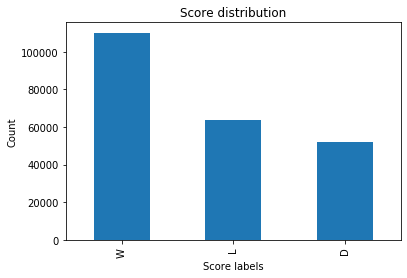

In [0]:
# plotting a bar chart to visualize the output column
df['Output'].value_counts().plot(kind='bar')
plt.title("Score distribution")
plt.xlabel("Score labels")
plt.ylabel("Count")

From the visualization above, there were more wins

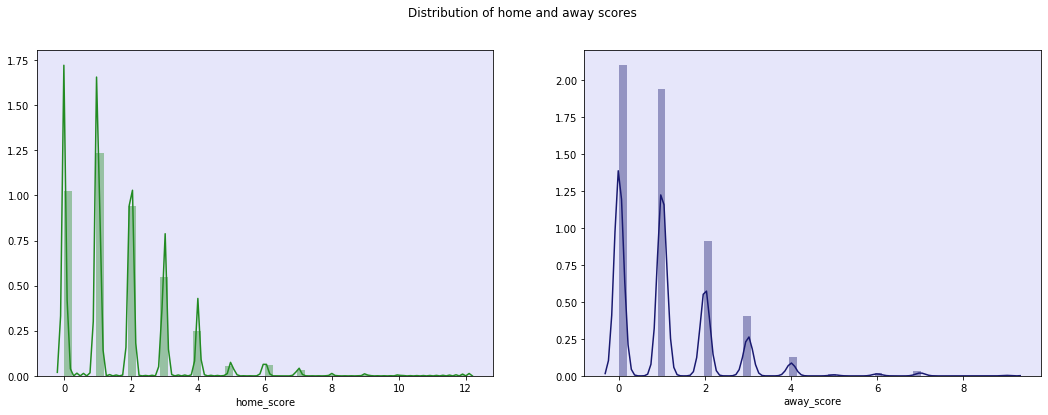

In [0]:
# plot a histogram to visualize the distribution of home and away scores
#
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
plt.suptitle('Distribution of home and away scores')
for ax, data, column, color in zip(axes.flatten(),df, ['home_score', 'away_score'], ['forestgreen', 'midnightblue']):
  sns.distplot(df[column], ax = ax, hist = True, color = color)
  ax.set_facecolor('lavender')

Clearly shown that the scores are skeewed to one side. 

# Implementing the solution

Approach 1: Using Polynomial Regression

In [0]:
# To be able to create a model, we need to select columns relevant to the reasearch question
#
df1 =df[['home_team',	'away_team','home_score',	'away_score',	'tournament', 'rank']]
df1.head()

,home_team,away_team,home_score,away_score,tournament,rank
0,Kuwait,Lebanon,3,2,Friendly,1
1,Kuwait,Lebanon,3,2,Friendly,2
2,Kuwait,Lebanon,3,2,Friendly,3
3,Kuwait,Lebanon,3,2,Friendly,4
4,Kuwait,Lebanon,3,2,Friendly,5


Testing for multicollinearity involves checking if the variables are highly correlated to each other

In [0]:
# Doing correlation
# 
corr = df1.corr()
corr

,home_score,away_score,rank
home_score,1.000000,-0.143110,0.000003
away_score,-0.143110,1.000000,0.000018
rank,0.000003,0.000018,1.000000


There's a high correlation between a variable and itself. The other variables are also related to each other but not highly correlated

In [0]:
# Creating a dataframe of the VIF
VIF = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
VIF

,home_score,away_score,rank
home_score,1.020909,0.146102,-0.000005
away_score,0.146102,1.020909,-0.000019
rank,-0.000005,-0.000019,1.000000


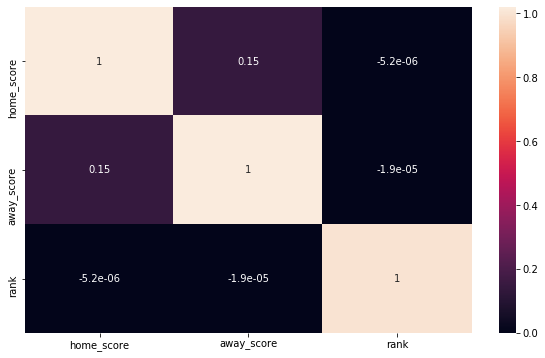

In [0]:
# Creating a heatmap to visualize the VIF calculated above
# 
plt.figure(figsize = (10, 6))
sns.heatmap(VIF, annot = True)
plt.show()

**Creating a polynimial model to work out the data**

In [0]:
X = df1.iloc[:, [0, 1, 3, 4, 5]]
y = df1.home_score

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

# Standardising the X_train and the X_test to the same scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the polynomial features to the X_train and X_test
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
np.sqrt(mean_squared_error(y_test, y_pred))

0.9925498694962196

The value above is the RMSE which measures the model. A lower RMSE translates to a good model hence our model can be userd to predict the result of a game

Performing heteroscedasticity

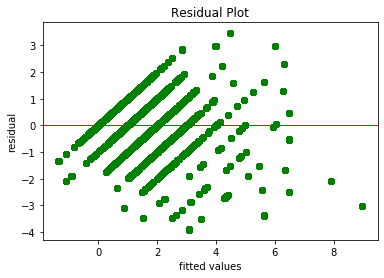

In [67]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
plt.scatter(y_pred, residuals, color='green')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Homoscedasticity describes the case where the variance of errors or the model is not the same for all observations
I used Bartlett's Test to perform the test

In [71]:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)
# Calculating the critical value of the chi squared distribution, to compare it with the test_result
degrees_of_freedom = len(y_pred) - 1
prob =  1 - p_value
critical_value = sp.stats.chi2.ppf(prob, degrees_of_freedom)

# If the test_result is greater than the critical value, then the null hypothesis is
# rejected. This means that there are patterns to the variance of the data

# Otherwise, if no patterns are identified, null hypothesis is not rejected. This means that 
# the variance is homogeneous across the dataset

if (test_result > critical_value):
  print(f'The test result of {np.round(test_result,2)} is greater than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print(f'The test result of {np.round(test_result,2)} is less than the critical value of {np.round(critical_value, 2)}')
  
  print('The variances are homogeneous')

The test result of 1426.99 is less than the critical value of inf
The variances are homogeneous


Approach 2: Use Logistic Regression

In [73]:
df1.head()

,home_team,away_team,home_score,away_score,tournament,rank
0,Kuwait,Lebanon,3,2,Friendly,1
1,Kuwait,Lebanon,3,2,Friendly,2
2,Kuwait,Lebanon,3,2,Friendly,3
3,Kuwait,Lebanon,3,2,Friendly,4
4,Kuwait,Lebanon,3,2,Friendly,5


In [75]:
# For logistic regression model, we start by choosing the columns we will use in creating a model
lg_df = df[['home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'year', 'rank', 'Output']]

# Previewing the first five rows of the data
lg_df.head()

,home_team,away_team,home_score,away_score,tournament,year,rank,Output
0,Kuwait,Lebanon,3,2,Friendly,2008,1,W
1,Kuwait,Lebanon,3,2,Friendly,2008,2,W
2,Kuwait,Lebanon,3,2,Friendly,2008,3,W
3,Kuwait,Lebanon,3,2,Friendly,2008,4,W
4,Kuwait,Lebanon,3,2,Friendly,2008,5,W


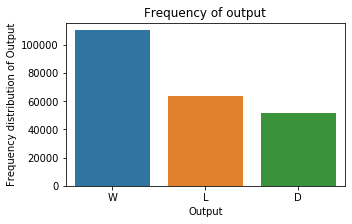

In [78]:
# Visualizing the output column to see how the results are distributed

plt.figure(figsize = (5, 3))
ax = sns.countplot(lg_df.Output)
plt.ylabel('Frequency distribution of Output')
plt.xlabel('Output')
plt.title('Frequency of output')
plt.show()

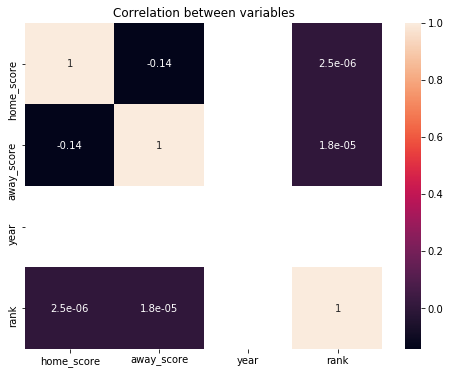

In [79]:
#  use a heatmap to visualize the correlation between the variables
#
plt.figure(figsize = (8, 6))
sns.heatmap(lg_df.corr(), annot = True) 
plt.title('Correlation between variables')
plt.show()

**Creating a logistic model to perform pediction**

In [81]:
# Spliting the data into features and the target variable
X = lg_df.drop('Output', axis = 1)
y = lg_df.Output

# Encoding the categorical features
X = pd.get_dummies(X, drop_first=True)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Instantiating the model and training the model
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Test and Training Scores
score = logistic.score(X_train, y_train)
score2 = logistic.score(X_test, y_test)

print('Training set accuracy: ', '%.3f'%(score))
print('Test set accuracy: ', '%.3f'%(score2))

# Making predictions
y_pred = logistic.predict(X_test)

Training set accuracy:  0.999
Test set accuracy:  0.999


From the results above, the model is highly efficient with a score of 99.9%

In [82]:
# running a confusion matrix to test our model.
# Confusion Matrix is a performance measurement for machine learning classification

from sklearn.metrics import confusion_matrix as cm,classification_report as cr,accuracy_score as ac
print(cm(y_pred,y_test))
print(cr(y_pred,y_test))
print(ac(y_pred,y_test))

[[13021     2     0]
 [    0 15933     0]
 [   67     0 27437]]
              precision    recall  f1-score   support

           D       0.99      1.00      1.00     13023
           L       1.00      1.00      1.00     15933
           W       1.00      1.00      1.00     27504

    accuracy                           1.00     56460
   macro avg       1.00      1.00      1.00     56460
weighted avg       1.00      1.00      1.00     56460

0.9987778958554729


In [86]:
# Interpretation of the matrix
# diagonal column
numbers = [13021,15933,27437]
print(sum(numbers))
# This means that the model can predict 56391 cases correctly.

56391
